# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2023/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday September 26th, 2023 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/

The assignment should be handed in as a group. To do this, all group members must register for peergrade individually. See how to hand in as a group here: https://help.peergrade.io/en/articles/69783-how-to-submit-as-a-group .

(If you haven't set up an account on peergrade yet, go to www.peergrade.io/join and type in the class code: ***DPZEV6***.)

# Part 1: Binning degree distributions


* Binning real numbers
  * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
  * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
  * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
* Binning integers
  * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
  * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.
  * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 
* Binning and plotting degree distributions. 
  * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
**Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
  * Now, use `networkx` to create the graph and extract the degree distribution.
  * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

Text(0, 0.5, '# Nodes')

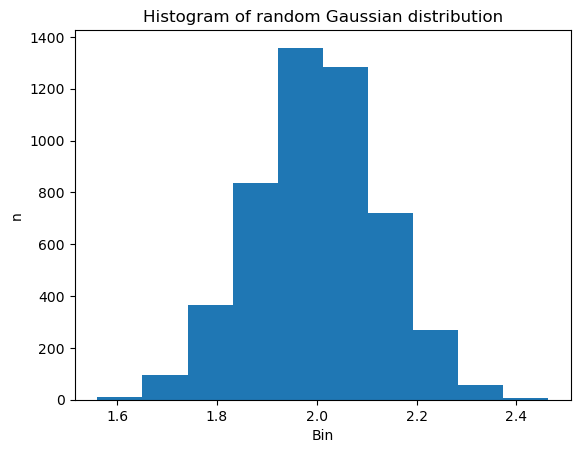

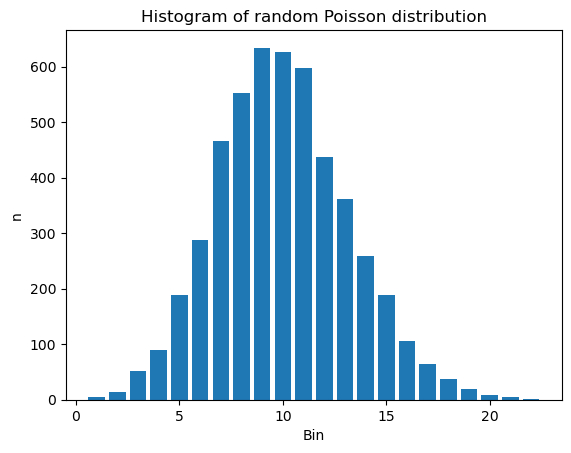

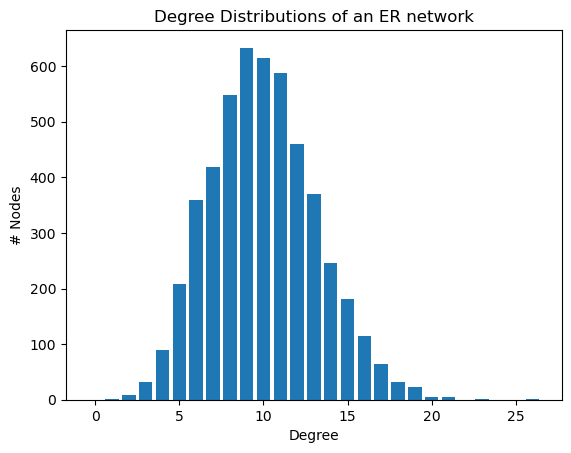

In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random


fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()

# Gauss
varg = [random.gauss(2, 0.125) for i in range(5000)]
ctg, bing = np.histogram(varg)
ax1.hist(varg, 10)  # Using matplotlibs .hist works as well
ax1.set_title("Histogram of random Gaussian distribution")
ax1.set_xlabel("Bin")
ax1.set_ylabel("n")

# Poisson
varp = np.random.poisson(10,5000)
minp = min(varp)
maxp = max(varp)
v = range(minp, maxp)
ctp, binp = np.histogram(varp, v)
ax2.bar(binp[0:-1], ctp)  # -1 removes outer right bound of bins
ax2.set_title("Histogram of random Poisson distribution")
ax2.set_xlabel("Bin")
ax2.set_ylabel("n")

# ER
ergraph = nx.gnp_random_graph(5000, 10/4999)
histlst = nx.degree_histogram(ergraph)
ax3.bar(range(len(histlst)), histlst)
ax3.set_title("Degree Distributions of an ER network")
ax3.set_xlabel("Degree")
ax3.set_ylabel("# Nodes")

**Plot description:** Histograms of Gauss, Poisson and ER Degree Distributions. The latter looks like a typical Poisson distribution.

# Part 2: Random networks and plotting in `networkx`
 
* In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
* Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

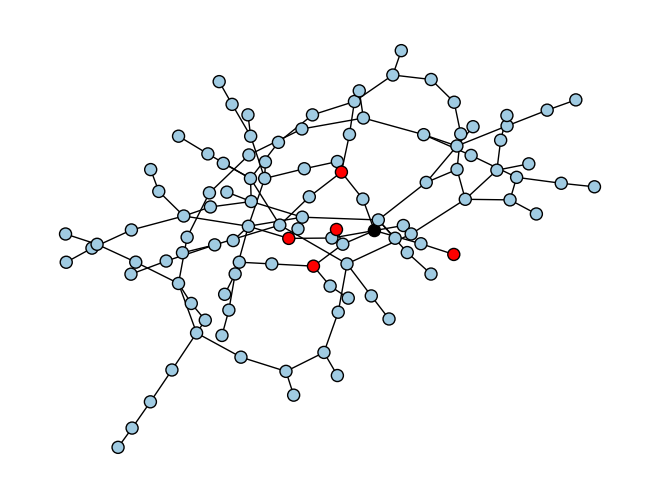

In [58]:
import networkx as nx
import random


rg = nx.gnp_random_graph(200, 1.5/(200-1))
cc = nx.connected_components(rg)
largest_c = max(cc, key=lambda x: len(x))
rgsub = nx.subgraph(rg, largest_c)

randnode = random.choice(list(rgsub.nodes))
lenghts = nx.single_source_shortest_path_length(rgsub, randnode)
filterednodes = {k: v for k, v in lenghts.items() if v == 2}

colordefault = "#A0CBE2"
colorstart = "#000000"
colorfiltered = "#FF0000"

nodecolors = [colorstart if node == randnode
              else colorfiltered if node in filterednodes.keys()
              else colordefault
              for node in list(rgsub.nodes)]

nx.draw(rgsub, node_color=nodecolors, node_size=75, edgecolors="#000000")

**Plot description:** GCC of an ER network. The black node was selected randomly, nodes which are two steps away are marked in red.

# Part 3: Watts-Strogatz Networks

* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.
* Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).


![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ws.png)

In [74]:
import networkx as nx
import matplotlib.pyplot as plt
# generate watts strogatz graphs

for i in [0, 0.1, 1]: 
    G = nx.watts_strogatz_graph(500, 4, i)
    print("average shortest path length for p=", i, ": ", nx.average_shortest_path_length(G))

average shortest path length for p= 0 :  62.875751503006015
average shortest path length for p= 0.1 :  8.500753507014029
average shortest path length for p= 1 :  4.727046092184369


**Answer to**: Describe what happens to the network when $p = 1$.

If p=1, then each node is rewired with probability of 1. That means, the node will never connect with it's neighbor,
and instead connect to any other randomly selected node in the graph.

In [75]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np

# create 50 networks with parameters stated above, take mean and standard deviation of <d>
p_values = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
mean = []
my = []
for j in p_values:
    path_lengths = []
    for i in range(0, 50): 
        G = nx.watts_strogatz_graph(500, 4, j)
        path_lengths.append(nx.average_shortest_path_length(G))
    my.append(np.std(path_lengths))
    mean.append(np.mean(path_lengths))

Text(0, 0.5, 'ave(< d >)')

<Figure size 640x480 with 0 Axes>

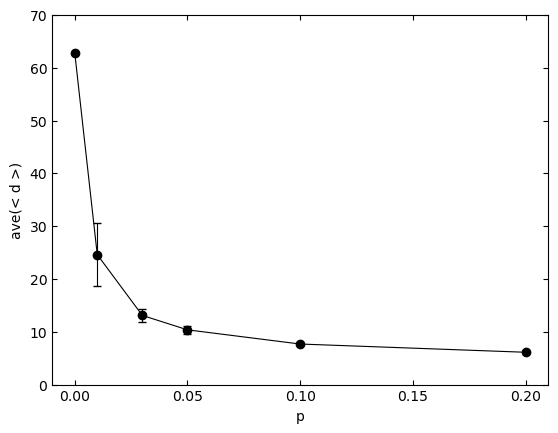

In [76]:
# draw figure as described above
plt.figure()
fig, ax = plt.subplots()
plt.errorbar(p_values, mean, yerr=my, fmt='-o', color='black', linewidth=0.8, capsize=3 )
ax.tick_params(top=True, bottom= True, left=True, right=True, direction='in')
ax.set_yticks([i for i in range(0, 80, 10)])
ax.set_xticks([0.0, 0.05, 0.1, 0.15, 0.2])
plt.xlabel("p")
plt.ylabel("ave(< d >)")

**Plot description:** Plot of the average path length of 50 WS-networks, on the x-axis, for different rewiring probabilities $p$, on the y-axis. Includes error bars which show standard deviation of the average path length.

# Part 4. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success

* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.
* Now create a 5000 node network.
  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ba.png)

## Solution to part 4

First we create a our own function `barabasi_graph` to generate the special case of a Barabasi-Albert model. Using this we can create and then draw our graph of 100 nodes.

In [77]:
# required imports
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [78]:
def barabasi_graph(no_of_nodes):
    g_barabasi = nx.Graph([(1, 2)])
    u = 3

    while u <= no_of_nodes:
        # calculate the probability of connection at each node already in the graph
        degrees_dict = dict(g_barabasi.degree)
        p = np.fromiter(degrees_dict.values(), dtype=int) / np.sum(np.fromiter(degrees_dict.values(), dtype=int))
        # select the node to connect to
        v = np.random.choice(np.fromiter(degrees_dict.keys(), dtype=int), p=p)

        g_barabasi.add_node(u)
        g_barabasi.add_edge(u, v)
        u += 1
    return g_barabasi

Graph with 100 nodes and 99 edges


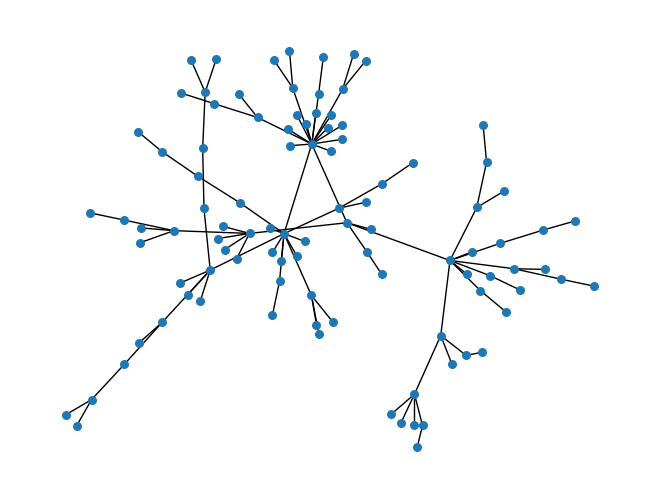

In [79]:
g_barabasi = barabasi_graph(100)
print(g_barabasi)
nx.draw(g_barabasi, node_size=30)

**Plot description:** As we can see, the result is a fully connected tree structure with noticeable hubs. This is due to connecting all nodes one by one to increase the graph size from 2 to 100.

Next we use the same function to create a graph with 5000 nodes:

Graph with 5000 nodes and 4999 edges


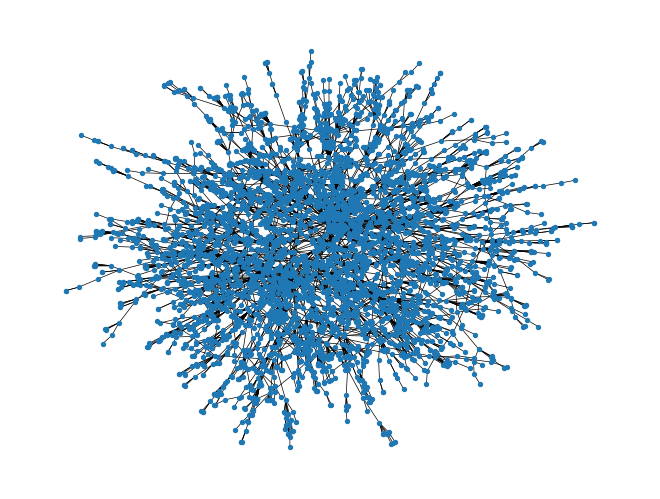

In [80]:
g_large = barabasi_graph(5000)
print(g_large)
nx.draw(g_large, node_size=8, width=0.5)

Due to our construction algorithm this larger graph is also a single connected component that is a tree graph. Here we can also clearly spot hubs and many leaf nodes hanging off of them.

In [81]:
k_values = np.array([[u, v] for (u,v) in g_large.degree])
k_max = np.max(k_values[:, 1:2])
k_min = np.min(k_values[:, 1:2])
print(f"The maximum degree in the graph with 5000 nodes is: ", k_max)
print(f"The minimum degree in the graph with 5000 nodes is: ", k_min)

The maximum degree in the graph with 5000 nodes is:  106
The minimum degree in the graph with 5000 nodes is:  1


Next we bin the graph degrees in `g_large` and get the multiplicity of each degree value. We plot this information below both using linear axes (top graph) and log-log axes (bottom graph):

C:\Users\andre\AppData\Local\Temp\ipykernel_31252\3661382666.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "p" (-> marker='p'). The keyword argument will take precedence.
  ax[0].plot(bins[:-1], counts, "p", color="blue", marker=P, markersize=3)
C:\Users\andre\AppData\Local\Temp\ipykernel_31252\3661382666.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "p" (-> marker='p'). The keyword argument will take precedence.
  ax[1].plot(bins[:-1], counts, "p", color="blue", marker=P, markersize=3)


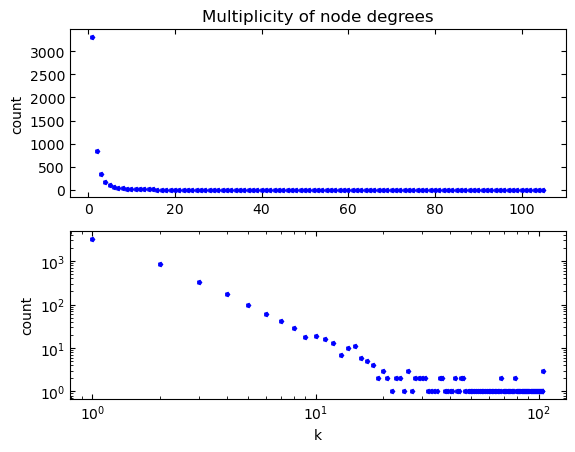

In [82]:
from matplotlib.markers import MarkerStyle

P = MarkerStyle("p")
P._transform.rotate_deg(-90)
v_bins = [i for i in range(k_min, k_max + 1)]
counts, bins = np.histogram(k_values, bins=v_bins)
fig, ax = plt.subplots(2)
ax[0].plot(bins[:-1], counts, "p", color="blue", marker=P, markersize=3)
ax[0].set_ylabel(ylabel="count")
ax[0].tick_params(top=True, left=True, bottom=True, right=True, direction="in")
ax[0].tick_params(top=True, left=True, bottom=True, right=True, which="minor", direction="in")
ax[0].set_title(label="Multiplicity of node degrees")
ax[0].set_yticks([i for  i in range(0, 3500, 500)])
ax[0].set_yticks([i for  i in range(0, 3500, 500)])
ax[1].plot(bins[:-1], counts, "p", color="blue", marker=P, markersize=3)
ax[1].tick_params(top=True, left=True, bottom=True, right=True, which="minor", direction="in")
ax[1].tick_params(top=True, left=True, bottom=True, right=True, direction="in")
ax[1].set_ylabel(ylabel="count")
ax[1].set_xlabel(xlabel="k")
ax[1].set_yscale("log")
ax[1].set_xscale("log")
plt.show()

**Plot descripition:** linear and log-log plot of the degree distribution of BA network.

# Part 5 Power-laws and the friendship paradox

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

* Pick a node _i_ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).
* Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.
* Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 

* Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.

## Solution to part 5 

We create the function `friendship_paradox` to execute a verification of the Friendship Paradox as detailed in the exercise description above.

In [83]:
import numpy as np
import networkx as nx

def friendship_paradox(g, verbose=False):
    i = np.random.choice(g.nodes)
    neighbours = np.fromiter(g.neighbors(i), dtype=int)
    if verbose:
        neighbour_str =", ".join([f"{n}" for n in neighbours])
        print(f"Chosen node is {i} with degree {g.degree[i]} and neighbour(s): {neighbour_str} ")

    degrees = []
    for n in neighbours:
        degrees.append(g.degree[n])
    if verbose:
        print(f"Average degree of i's friends: {np.mean(degrees)}")

    if(g.degree[i] < np.mean(degrees)):
        if verbose:
            print(f"The Friendship paradox holds for i.")
        return True
    else:
        if verbose:
            print(f"The Friendship paradox does not hold for i.")
        return False

In [84]:
res = friendship_paradox(g_barabasi, verbose=True)

Chosen node is 40 with degree 1 and neighbour(s): 28 
Average degree of i's friends: 3.0
The Friendship paradox holds for i.


Now we perform the same for 1000 samples:

In [85]:
sample = [friendship_paradox(g_barabasi) for _ in range(1000)]
print(f"The Friendship Paradox holds in {np.count_nonzero(sample)} samples out of 1000.")

The Friendship Paradox holds in 829 samples out of 1000.


Now we will use a new version of our `barabasi_graph` function for the growth mechanism without preferential attachment.

In [86]:
def random_growth(no_of_nodes):
    g = nx.Graph([(1, 2)])
    u = 3

    while u <= no_of_nodes:
        # select the node to connect to
        v = np.random.choice(np.fromiter(dict(g.nodes).keys(), dtype=int))

        g.add_node(u)
        g.add_edge(u, v)
        u += 1
    return g

Graph with 5000 nodes and 4999 edges


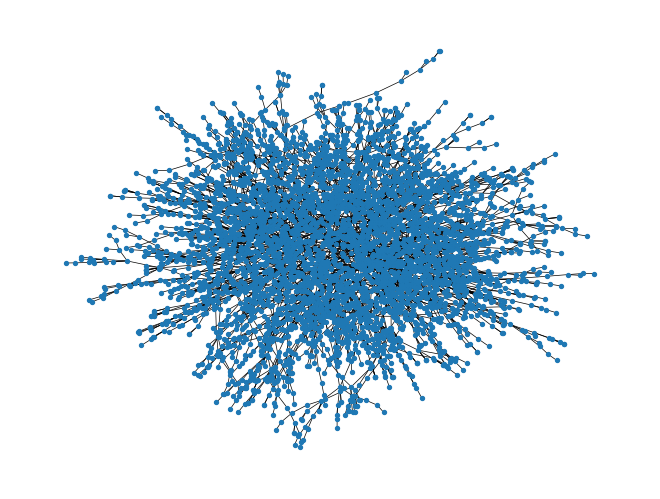

In [87]:
g_uniform = random_growth(5000)
print(g_uniform)
nx.draw(g_uniform, node_size=8, width=0.5)

As we can see, the shape of the graph is slightly different. Since the connection pair for each new node is chosen uniformly at random, we get less hubs with smaller degree values. We can also clearly see more nodes at the "edge" of the structure that have a small degree (e.g. 2) but are not leaf nodes. This graph is also a tree graph. 
Let's now look at an Erdos-Renyi graph with the same number of nodes and average degree.

In [88]:
import pandas as pd
k = pd.DataFrame(g_uniform.degree).sort_values(1, ascending=False)[1].mean()

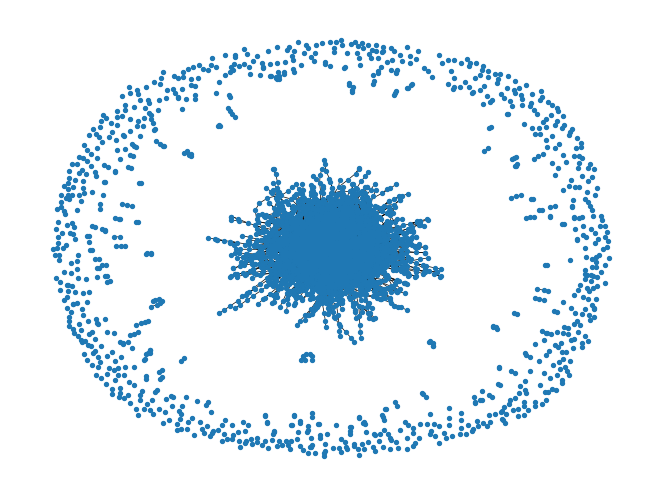

In [89]:
import pandas as pd
k = pd.DataFrame(g_uniform.degree)[1].mean()
p = k / 4999
ER = nx.erdos_renyi_graph(5000, p)
nx.draw(ER, node_size=8, width=0.5)

We can see a very interconnected central graph component and lots of isolated or very small components at the edge of this image. This is because we are not constructing the Erdos-Renyi graph iteratively but take a global view of all nodes and choose the edges to include based on the given probability.

# Part 6 Configuration-model networks

Next, we will create configuration-model networks with degree distributions of our own choice. Follow the recipe below for success

* Extract the degree sequence for the 100-node Barabasi-Albert network you created in Part 4 above. Create the configuration-model network with an algorithm you have coded on your own and include this algorithm as part of your answer to this exercise (so don't use the built-in NetworkX function, but the one you created during week 3). 
* Plot the network using NetworkX. When you compare this network to your Barabasi-Albert network visually, what differences do you notice?
* Create a 5000-node configuration-model network, where half of the nodes have degree 3 and the other half have degree 5. Again, create the network using the function you coded in Week 3, and not using the NetworkX function.
* What should the sum of node degrees be if all nodes had degrees as described in the exercise?
* Calculate and print the sum of node degrees and plot the binned degree distribution nicely. If the node degrees are not exactly as described in the exercise (half having degree 3, the other half degree 5), explain what might have caused this difference in node degrees.

## Solution to part 6

First we create the function `configuration_model` that we will use in the following:

In [90]:
import random
import networkx as nx
import matplotlib.pyplot as plt

def configuration_model (degrees) :
    
    halfedges = [] # a list of halfedges
    
    # Now append integer i to `halfedges` k times if the ith entry of degrees is equal to k:
    # STEP ONE GOES HERE..
    for i in range(0,len(degrees)):
        for k in range(0, degrees[i]):
            halfedges.append(i)

    # STEP ONE ENDS HERE
    #print("Check if the following ouput matches what you expect 'halfedges' to look like")
    #print(halfedges)
    
    # Shuffle the list halfedges
    # STEP TWO GOES HERE..
    random.shuffle(halfedges)
    # STEP TWO ENDS HERE   
    
    # Append the resulting edges to the list `edgelist` as tuples 
    # [that is, append (i,j) if i and j should be connected by and edge]
    
    edgelist = [] # This will contain tuples (i,j) indicating edges between nodes i and j.    
    # STEP THREE GOES HERE..
    edgelist = [(halfedges[i-1], halfedges[i]) for i in range(1, len(halfedges) + 1, 2)]
    # STEP THREE ENDS HERE    

    return edgelist #Return list of tuples indicating edges



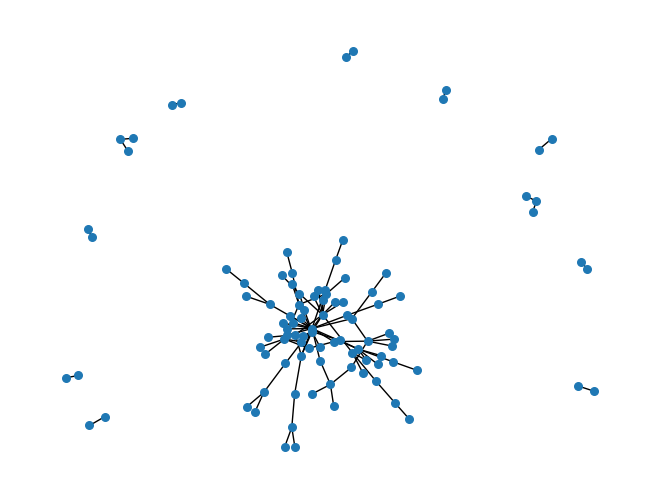

In [91]:
config_network_barabasi = nx.configuration_model([deg for (i, deg) in g_barabasi.degree])
nx.draw(config_network_barabasi, node_size=30)

**Plot description:** Plot of the configuration model, with the configuration being the node degrees of the Barabasi-Albert network. Notice the self loops as well as the small components.

**Question:** 
Plot the network using NetworkX. When you compare this network to your Barabasi-Albert network visually, what differences do you notice?

**Answer:**
Network contains loops, as the shuffling mechanism is a too simple for to avoid connecting nodes to themselves.
Sometimes components are not connected to the rest of the graphs, also as a result of the shuffling mechanism.

On the other hand, the barabasi network forms on giant component, contains no self loop due new nodes always connecting to existing ones, preferring nodes with higher degree.

Now we will create a configuration network with 5000 nodes, with 1/2 of the nodes degree 3 and other 1/2 nodes degree 5

In [92]:
N = 5000
config_split = [3 if idx < N / 2 else 5 for idx, _ in enumerate(range(N))]

edges_config_split = configuration_model(config_split)
G_config_split = nx.Graph()
G_config_split.add_edges_from(edges_config_split)

# Answer to question: if 1/2 nodes had degree 3 and 1/2 nodes had degree 5, the sum of total degrees would be: 
print("Calculated sum of node degrees: ", 2500 * 3 + 2500 * 5)
# 20 000 as seen in the output

k_values_config_split = np.fromiter(dict(G_config_split.degree).values(), dtype=int)
print("Actual sum of node degrees: ", np.sum(k_values_config_split))

k_min_config_split = np.min(k_values_config_split)
k_max_config_split = np.max(k_values_config_split)

print("min: ", k_min_config_split)
print("max: ", k_max_config_split)

Calculated sum of node degrees:  20000
Actual sum of node degrees:  19998
min:  2
max:  5


unique values and their counts:  (array([2, 3, 4, 5]), array([   1, 2499,    1, 2499], dtype=int64))
Bins of the histogram:  [2 3 4 5 6]
counts for the bins:  [   1 2499    1 2499]


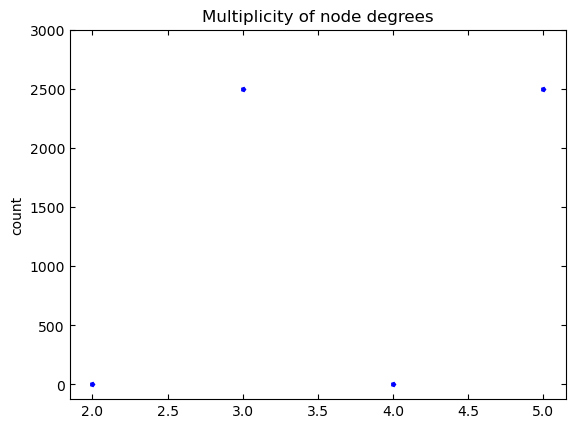

In [93]:
v_bins_config_split = [i for i in range(k_min_config_split, k_max_config_split + 2)]
counts, bins = np.histogram(k_values_config_split, bins=v_bins_config_split)

print("unique values and their counts: ", np.unique(k_values_config_split, return_counts=True))
print("Bins of the histogram: ", bins)
print("counts for the bins: ", counts)

# in the output we see that we successfully put each unique value in their respective bins

fig, ax = plt.subplots()

P = MarkerStyle("p")
P._transform.rotate_deg(-90)

ax.plot(bins[:-1], counts, color="blue", marker=P, linestyle='', markersize=3)
ax.set_ylabel(ylabel="count")
ax.tick_params(top=True, left=True, bottom=True, right=True, direction="in")
ax.tick_params(top=True, left=True, bottom=True, right=True, which="minor", direction="in")
ax.set_title(label="Multiplicity of node degrees")
ax.set_yticks([i for  i in range(0, 3500, 500)])
ax.set_yticks([i for  i in range(0, 3500, 500)])
plt.show()

# no need for a log-log-plot as we have very little variation in our degree-distribution

**Figure description:** In the graph above, we see the degree distribution of the configuration network with configuration of 1/2 nodes have degree 3, other 1/2 nodes have degree 5. As we can see, the degree distribution does not match the configuration.

**Question:**  If the node degrees are not exactly as described in the exercise (half having degree 3, the other half degree 5), explain what might have caused this difference in node degrees.

**Answer:** As we can see in the figure of the configuration model created from the AB network (far above), the configuration model creates loops (connections from and to the same node) and Multiedges (i.e., 2 connections from a-b, or connections from a-b and from b-a, which do not increase the degree. These do not shown on the plot). In an nx.Graph, the multiedges are now allowed, so they are not counted towards the node degree. Thus, the degree distribution and sum of degrees is different from what we expected.

Multiedges are counted towards the degree of a node in a Multigraph (e.g. in nx.MultiGraph).